# Résolution d'équations non linéaires
## Fichier d'aide
### Alban Gossard (gossard@insa-toulouse.fr)

Importation des packages de calcul scientifique pour Python 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


Dans ce TP, on va mettre en oeuvre les méthodes vues en cours pour la résolution d'équations non linéaires du type

$$
F(x) = 0,
$$

où $F$ est une fonction de $\mathbb{R}$ dans $\mathbb{R}$. Ces méthodes sont au nombre de 3: la méthode de dichotomie, la méthode du point fixe et la méthode de Newton. Nous allons nous intéresser au cas où la fonction $F$ est donnée par

$$
F(x) = 10^{-1}x^2 - \cos(x/2)-e^{-x/4}.
$$

## Graphe de $F$ et localisation grossière des racines

Afin de se faire une idée de la fonction (et de ses racines), on se propose tout d'abord de tracer le graphe de $F$. Pour cela, on commence par implémenter la fonction $F$ qui prendra en entrée un vecteur $x$ et donnera en sortie un vecteur $y$ de même taille que $x$ et tel que, pour tout indice $k$,

$$
y_k = F(x_k).
$$

Ensuite, on trace le graphe de $F$ à l'aide de la fonction `plt.plot` sur l'intervalle $[-10,10]$ avec un millier de points.

> **À faire **: Implémenter la fonction $F$ et tracer son graphe. Donner un intervalle de longueur $1$ autour de chaque racine $F$ dans l'intervalle $[-10,10]$.

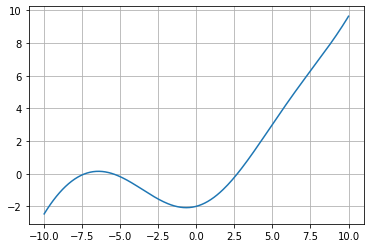

In [2]:
def F(x):
    # Renvoie la valeur de la fonction F en x
    # x: salaire ou array correspondant aux points d'évaluation de la fonction
    return ???
x=np.linspace(-10,10,200)
plt.plot(x,F(x))
plt.grid(True)
plt.show()

> **Réponse **:...

## Méthode de dichotomie

On passe maintenant au calcul de racines par la méthode de dichotomie. Pour cela, on va implémenter une fonction `Dichotomie` qui aura comme arguments d'entrée:

- une fonction `F` dont on cherche une racine,
- un scalaire `a` et un scalaire `b` pour définir l'intervalle initial,
- un scalaire `eps` pour le critère d'arrêt (qui aura, par défaut, la valeur $10^{-10}$),
- un entier `itermax` pour le nombre maximal d'itérations (qui aura, par défaut, la valeur $100$),

et comme arguments de sortie:

- un vecteur `X` qui contient la suite $(x_k)_{0\leq j\leq k}$ construite par la méthode et dont le dernier élément est l'approximation d'une racine de `F`,
- un entier `k` correspondant au nombre total d'itérations réalisées.

> **À faire **: Implémenter la méthode de la dichotomie. Tester celle-ci sur la fonction $F$ avec comme intervalle initial $[-10,10]$ puis calculer la plus grande racine de $F$ sur l'intervalle $[-10,10]$ à une précision de $10^{-12}$.

X= [0.         5.         2.5        3.75       3.125      2.8125
 2.65625    2.734375   2.6953125  2.71484375 2.70507812 2.70019531
 2.69775391 2.69897461 2.69958496 2.69927979 2.6991272  2.69920349
 2.69924164 2.69926071 2.69927025 2.69927502 2.6992774  2.69927621
 2.69927561 2.69927531 2.69927546 2.69927539 2.69927543 2.69927545
 2.69927545 2.69927546 2.69927546 2.69927546 2.69927546 2.69927546
 2.69927546 2.69927546] en 38 itérations


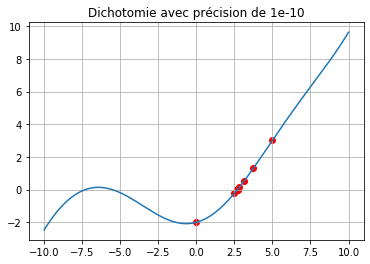

X= [0.         5.         2.5        3.75       3.125      2.8125
 2.65625    2.734375   2.6953125  2.71484375 2.70507812 2.70019531
 2.69775391 2.69897461 2.69958496 2.69927979 2.6991272  2.69920349
 2.69924164 2.69926071 2.69927025 2.69927502 2.6992774  2.69927621
 2.69927561 2.69927531 2.69927546 2.69927539 2.69927543 2.69927545
 2.69927545 2.69927546 2.69927546 2.69927546 2.69927546 2.69927546
 2.69927546 2.69927546 2.69927546 2.69927546 2.69927546 2.69927546
 2.69927546 2.69927546 2.69927546] en 45 itérations


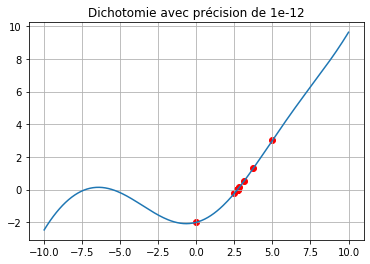

In [3]:
def Dichotomie(F, a, b, eps=1e-10, itermax=100):
    # Réalise la recherche de racines par dichotomie sur l'intervalle [a,b]
    # F:                fonction dont on cherche les racines
    # a (scalaire):     borne inférieure de l'intervalle de recherche
    # b (scalaire):     borne supérieure de l'intervalle de recherche
    # eps (scalaire):   tolérance du critère d'arrêt, valeur par défaut: 1e-10
    # itermax (entier): nombre maximum d'itérations, valeur par défaut: 100
    
    return np.array(X),k
X,k=Dichotomie(F,-10,10)
print("X=",X,"en",k,"itérations")
plt.plot(x,F(x))
plt.scatter(X,F(X),color='red')
plt.grid(True)
plt.title("Dichotomie avec précision de 1e-10")
plt.show()
X,k=Dichotomie(F,-10,10,eps=1e-12)
print("X=",X,"en",k,"itérations")
plt.plot(x,F(x))
plt.scatter(X,F(X),color='red')
plt.grid(True)
plt.title("Dichotomie avec précision de 1e-12")
plt.show()

## Méthode du point fixe

À présent, on va implémenter la méthode du point fixe. On implémentera pour cela une fonction `Point_fixe` qui aura comme arguments d'entrée:
- une fonction `F` dont on cherche une racine,
- une fonction `Fp` correspondant à la dérivée de `F`,
- un scalaire `x_0` correspondant à la valeur initial de la méthode,
- un scalaire `a` et un scalaire `b` pour définir l'intervalle où évaluer la dérivée,
- un scalaire `eps` pour le critère d'arrêt (qui aura, par défaut, la valeur $10^{-10}$),
- un entier `itermax` pour le nombre maximal d'itérations (qui aura, par défaut, la valeur $100$),

et comme arguments de sortie:

- un vecteur `X` qui contient la suite $(x_k)_{0\leq j\leq k}$ construite par la méthode et dont le dernier élément est l'approximation d'une racine de `F`,
- un entier `k` correspondant au nombre total d'itérations réalisées.

> **À faire **: Calculer la dérivée de la fonction $F$ et implémenter sous une fonction `Fp`. Puis implémenter la méthode du point fixe. Cette méthode peut s'écrire sous la forme suivante
$$
\left\{\begin{array}{ll}
x_0\in I = [a,b]\textrm{ tel que la racine recherchée est dans $I$ et $F$ est monotone sur $I$},\\
M = \left\{\begin{array}{ll}\sup_{y\in I} F'(y),\textrm{ si $F$ est croissante sur $I$}\\\\inf_{y\in I} F'(y),\textrm{ si $F$ est décroissante sur $I$}
\end{array}\right.\\
x_{k+1} = x_k - \frac{F(x_k)}{M},\quad k\geq 0.
\end{array}\right.
$$

In [4]:
def Fp(x):
    # Fonction renvoyant la dérivée de la fonction F
    # x: salaire ou array correspondant aux points d'évaluation
    return ???

def Point_fixe(F, Fp, x_0, a, b, eps = 1e-10, itermax = 100):
    # Réalise la recherche de racines par méthode du point fixe
    # La valeur maximale (ou minimale) de la dérivée est estimée en discrétisant un intervalle [a,b] avec un pas de 1e-3 et en évaluant la dérivée en ces points.
    # On prend ensuite la valeur maximale (ou minimale) sur l'ensemble de ces points.
    # F:                fonction dont on cherche les racines
    # Fp:               dérivée de la fonction dont on cherche les racines
    # x_0 (scalaire):   valeur initiale
    # a (scalaire):     borne inférieure de l'intervalle d'estimation de M
    # b (scalaire):     borne supérieure de l'intervalle d'estimation de M
    # eps (scalaire):   tolérance du critère d'arrêt, valeur par défaut: 1e-10
    # itermax (entier): nombre maximum d'itérations, valeur par défaut: 100
    
    return np.array(X),k

> **À faire **:  Ensuite, tester la méthode du point fixe sur la fonction $F$ avec comme valeur initiale $0$ et sur l'intervalle $[0,5]$.

X= [1.45656577 2.35159115 2.63365847 2.68849924 2.69755431 2.69900183
 2.69923199 2.69926856 2.69927437 2.69927529 2.69927543 2.69927546
 2.69927546 2.69927546 2.69927546] en 15 itérations


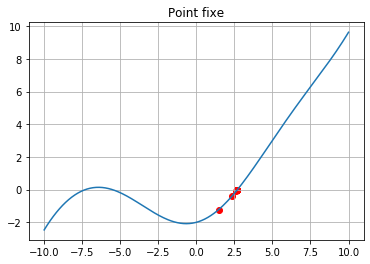

In [5]:
X,k=Point_fixe(F, Fp, 0, 0, 5)
print("X=",X,"en",k,"itérations")
plt.plot(x,F(x))
plt.scatter(X,F(X),color='red')
plt.grid(True)
plt.title("Point fixe")
plt.show()

## Méthode de Newton

On passe enfin à la méthode de Newton. On implémentera pour cela une fonction `Newton` qui aura comme arguments d'entrée:
- une fonction `F` dont on cherche une racine,
- une fonction `Fp` qui correspond à la dérivée de `F`,
- un scalaire `x_0` correspondant à la valeur initial de la méthode,
- un scalaire `eps` pour le critère d'arrêt (qui aura, par défaut, la valeur $10^{-10}$),
- un entier `itermax` pour le nombre maximal d'itérations (qui aura, par défaut, la valeur $100$),

et comme arguments de sortie:

- un vecteur `X` qui contient la suite $(x_k)_{0\leq j\leq k}$ construite par la méthode et dont le dernier élément est l'approximation d'une racine de `F`,
- un entier `k` correspondant au nombre total d'itérations réalisées.

> **À faire **: Implémenter la méthode de Newton. Tester cette dernière avec comme condition initiale $x_0 = -3$.

X= [-5.26118156 -5.49549167 -5.51902816 -5.51928823 -5.51928826] en 5 itérations


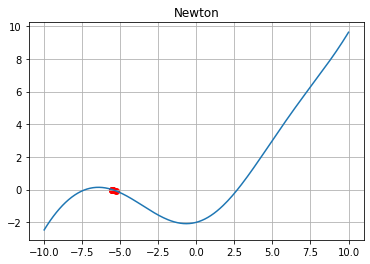

In [6]:
def Newton(F, Fp, x_0, eps = 1e-10, itermax = 100):
    # Réalise la recherche de racines par méthode de Newton
    # F:                fonction dont on cherche les racines
    # Fp:               dérivée de la fonction dont on cherche les racines
    # x_0 (scalaire):   valeur initiale
    # eps (scalaire):   tolérance du critère d'arrêt, valeur par défaut: 1e-10
    # itermax (entier): nombre maximum d'itérations, valeur par défaut: 100
    
    return np.array(X),k
X,k=Newton(F, Fp, -3)
print("X=",X,"en",k,"itérations")
plt.plot(x,F(x))
plt.scatter(X,F(X),color='red')
plt.grid(True)
plt.title("Newton")
plt.show()

## Comparaison des méthodes

Dans cette dernière section, on va comparer les méthodes et notamment la vitesse de convergence de celle-ci. Tout d'abord, on va calculer chacune des racines de $F$ avec une précision de $10^{-15}$ à l'aide de la méthode de votre choix. On note $x^*_i$ la $i$-ème racine de $F$ obtenue de cette manière. Ensuite, on va tracer l'évolution, pour chaque méthode et pour chaque racine de $F$, de l'erreur:

$$
e_n^{(k)} = \log_{10} (|x_n-x_k^*|),
$$
pour $n$ allant de $0$ jusqu'au nombre total d'itérations de chaque méthode. 


> **À faire **: Tracer, pour chaque racine, l'évolution de $e_n^{(k)}$ pour chaque méthode sur un même graphique. Les conditions initiales seront $x_0 = -7, -5$ et $2$. Pour la méthode de la dichotomie, on commencera avec un intervalle de taille $1$ tel que $a$ ou $b$ est égal à $x_0$. L'évaluation du paramètre $M$ pour la méthode du point fixe se fera sur le même intervalle que l'intervalle de départ de la dichotomie. Le paramètre `eps` sera fixé à $10^{-12}$. Commenter le résultat.

k= 130
k= 27
k= 25


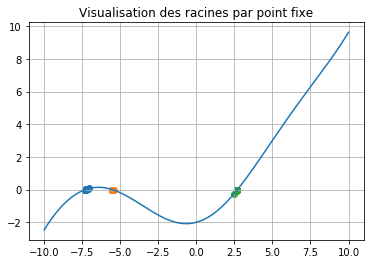

[-7.29917909 -5.51928826  2.69927546]


In [7]:
list_x0=[-7,-5,2]
list_a=[-10,-6,0]
list_b=[-6,-5,10]
xi=np.zeros(len(list_x0))
for i,(x0,a,b) in enumerate(zip(list_x0,list_a,list_b)):
    X,k=Point_fixe(F, Fp, x0, a, b, eps=1e-15, itermax=500)
    print('k=',k)
    xi[i]=X[-1]
    plt.scatter(X,F(X))
plt.plot(x,F(x))
plt.grid(True)
plt.title("Visualisation des racines par point fixe")
plt.show()
print(xi)

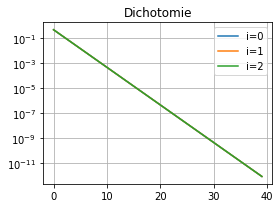

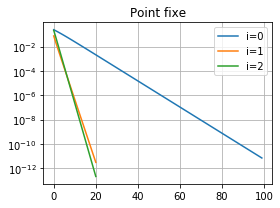

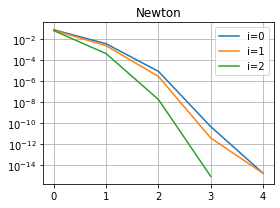

In [8]:
eps=1e-12

plt.figure(figsize=(4,3))
for i in range(xi.shape[0]):
    if i==2:
        X,k=Dichotomie(F,xi[i],xi[i]+1,eps=eps)
    else:
        X,k=Dichotomie(F,xi[i]-1,xi[i],eps=eps)
    plt.semilogy(np.abs(X-xi[i]),label='i='+str(i))
plt.legend()
plt.grid(True)
plt.title('Dichotomie')
plt.tight_layout()
plt.show()

plt.figure(figsize=(4,3))
for i in range(xi.shape[0]):
    X,k=Point_fixe(F, Fp, list_x0[i], list_a[i],list_b[i],eps=eps)
    plt.semilogy(np.abs(X-xi[i]),label='i='+str(i))
plt.legend()
plt.grid(True)
plt.title('Point fixe')
plt.tight_layout()
plt.show()

plt.figure(figsize=(4,3))
for i in range(xi.shape[0]):
    X,k=Newton(F, Fp, list_x0[i],eps=eps)
    plt.semilogy(np.abs(X-xi[i]),label='i='+str(i))
plt.legend()
plt.grid(True)
plt.title('Newton')
plt.tight_layout()
plt.show()